In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: >

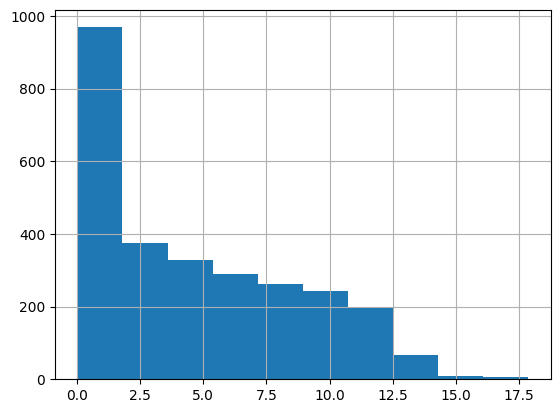

In [ ]:
df['Alcohol'].hist()

In [ ]:
df['Alcohol'].describe()

count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64

In [ ]:
df[df['Alcohol'].isna()].describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,194.000000,193.000000,193.000000,194.000000,0.0,194.000000,171.000000,194.000000,177.000000,194.000000,182.000000,5.00000,182.000000,194.000000,158.000000,1.560000e+02,177.000000,177.000000,185.000000,185.000000
mean,2014.319588,70.019171,169.585492,24.273196,NaN,5.174513,82.391813,1432.659794,42.779096,32.737113,82.532967,5.17200,83.780220,0.908247,6649.883593,1.019419e+07,4.523164,4.566102,0.642465,11.926486
std,2.549190,9.115748,109.452302,81.175193,NaN,45.383467,24.148895,7622.318352,20.838758,104.580276,24.508574,3.38384,22.707266,1.541426,10990.636165,2.767789e+07,4.008241,4.089910,0.220503,4.230698
min,2000.000000,48.900000,1.000000,0.000000,NaN,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,2.62000,6.000000,0.100000,33.681223,2.920000e+02,0.100000,0.100000,0.000000,0.000000
25%,2015.000000,63.500000,81.000000,0.000000,NaN,0.000000,79.500000,0.000000,24.300000,0.000000,79.500000,2.74000,81.250000,0.100000,778.923541,2.771510e+05,1.600000,1.500000,0.514000,10.300000
50%,2015.000000,72.700000,147.000000,3.000000,NaN,0.000000,93.000000,9.000000,48.600000,4.000000,93.000000,2.77000,93.000000,0.100000,2634.401577,1.784496e+06,3.500000,3.400000,0.701000,12.800000
75%,2015.000000,76.200000,241.000000,26.000000,NaN,0.000000,97.000000,204.000000,61.400000,38.000000,97.000000,8.46000,97.000000,0.700000,6516.606162,8.790661e+06,6.500000,6.400000,0.792000,14.600000
max,2015.000000,88.000000,484.000000,910.000000,NaN,527.307672,99.000000,90387.000000,83.300000,1100.000000,99.000000,9.27000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.938000,20.400000


In [ ]:
df=df.loc[df['Country']=='Zimbabwe']
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


In [ ]:
df=df.loc[df['Year']!=2015]
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import numpy as np
scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(df['Alcohol']).reshape(-1,1))
dataset = pd.DataFrame(data)
data

array([[1.        ],
       [0.97717842],
       [0.91493776],
       [0.89626556],
       [0.73236515],
       [0.61410788],
       [0.39004149],
       [0.45643154],
       [0.59958506],
       [0.51037344],
       [0.5560166 ],
       [0.49377593],
       [0.57053942],
       [0.00829876],
       [0.        ]])

In [ ]:
X=np.array(range(14, -1, -1)).reshape(-1, 1)
X
y=data
regr = MLPRegressor(random_state=1).fit(X, data)
y1=regr.predict(np.array([15]).reshape(-1, 1))
y1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.85464204])

In [ ]:
y_new = [0.85464204]
for _ in range(len(y)):
  y_new.append(y[_][0])
y_new
y_n=scaler.inverse_transform(np.array(y_new).reshape(-1,1))
y_n

array([[5.79937463],
       [6.5       ],
       [6.39      ],
       [6.09      ],
       [6.        ],
       [5.21      ],
       [4.64      ],
       [3.56      ],
       [3.88      ],
       [4.57      ],
       [4.14      ],
       [4.36      ],
       [4.06      ],
       [4.43      ],
       [1.72      ],
       [1.68      ]])

In [ ]:
df = pd.read_csv('/content/data.csv')
df=df.loc[df['Country']=='Zimbabwe']
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


In [ ]:
df.loc[2922, 'Alcohol']=5.8
df.loc[2927, 'Hepatitis B']=90
df.loc[2934, 'Hepatitis B']=70
df.loc[2934, 'Polio']=70
df.loc[2931, 'Diphtheria ']=70
df.loc[2935, ' thinness  1-19 years']=10.2
df.loc[2936, ' thinness  1-19 years']=10.6
df.loc[2935, ' thinness 5-9 years']=10.3
df.loc[2935, ' thinness 5-9 years']=10.7
df.loc[2924, ' BMI ']=30.8
df.loc[2925, ' BMI ']=30.3
df.loc[2928, 'GDP']*=10
df.loc[2935, 'GDP']*=10
df.loc[2924, 'Population']*=100
df.loc[2925, 'Population']*=10
df.loc[2927, 'Population']*=10
df.loc[2928, 'Population']*=10
df.loc[2930, 'Population']*=10
df.loc[2932, 'Population']*=100
df.loc[2935, 'Population']*=100
df.loc[2930, 'Adult Mortality']*=10
df.loc[2931, 'Adult Mortality']*=100
df.loc[2935, 'Adult Mortality']*=10
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,Zimbabwe,2015,Developing,67.0,336.0,22,5.80,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,15545600.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,14718260.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,90.0,9696,...,89.0,5.37,89.0,15.7,713.635620,14863170.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,658.241210,13815990.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,670.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,13329990.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,700.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,70.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


In [ ]:
df.loc[2922, 'Total expenditure']=6.57

In [ ]:
df1=df.drop('Country', axis=1)
df1=df1.drop('Status', axis=1)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,2015,67.0,336.0,22,5.80,0.000000,87.0,0,31.8,32,88.0,6.57,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,2014,59.2,371.0,23,6.50,10.822595,91.0,0,31.3,34,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,2013,58.0,399.0,25,6.39,10.666707,95.0,0,30.8,36,95.0,6.88,95.0,6.8,111.227396,15545600.0,6.2,6.0,0.488,10.4
2925,2012,56.6,429.0,26,6.09,92.602336,97.0,0,30.3,39,95.0,6.69,95.0,8.8,955.648466,14718260.0,6.5,6.4,0.464,9.8
2926,2011,54.9,464.0,28,6.00,63.750530,94.0,0,29.9,42,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,2010,52.4,527.0,29,5.21,53.308581,90.0,9696,29.4,44,89.0,5.37,89.0,15.7,713.635620,14863170.0,7.1,7.0,0.436,10.0
2928,2009,50.0,587.0,30,4.64,1.040021,73.0,853,29.0,45,69.0,6.26,73.0,18.1,658.241210,13815990.0,7.5,7.4,0.419,9.9
2929,2008,48.2,632.0,30,3.56,20.843429,75.0,0,28.6,46,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,2007,46.6,670.0,29,3.88,29.814566,72.0,242,28.2,46,73.0,4.47,73.0,23.7,396.998217,13329990.0,8.2,8.2,0.414,9.6
2931,2006,45.4,700.0,28,4.57,34.262169,68.0,212,27.9,45,71.0,5.12,70.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


In [ ]:
df1[2828, 'percentage expenditure']=10.4
df1.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,"(2828, percentage expenditure)"
Year,1.000000,0.900171,-0.912652,-0.105794,0.867915,0.415014,0.720244,0.018816,0.998807,-0.378525,...,-0.054505,0.763368,-0.994470,-0.223417,0.974084,-0.998166,-0.446644,0.761979,0.638507,NaN
Life expectancy,0.900171,1.000000,-0.976397,-0.463011,0.723907,0.256984,0.806092,-0.015006,0.914756,-0.686371,...,0.191935,0.828354,-0.867879,-0.264981,0.937200,-0.875393,-0.498555,0.937830,0.791092,NaN
Adult Mortality,-0.912652,-0.976397,1.000000,0.403459,-0.747487,-0.352118,-0.888690,-0.020219,-0.922073,0.642512,...,-0.194948,-0.909554,0.897126,0.185407,-0.950544,0.891648,0.525388,-0.932467,-0.810696,NaN
infant deaths,-0.105794,-0.463011,0.403459,1.000000,-0.109005,0.316464,-0.346207,0.256429,-0.150307,0.944692,...,-0.616058,-0.319647,0.037447,0.404212,-0.231551,0.046517,0.189532,-0.685846,-0.472297,NaN
Alcohol,0.867915,0.723907,-0.747487,-0.109005,1.000000,0.431869,0.622925,-0.006752,0.868166,-0.338680,...,0.115557,0.641523,-0.860406,-0.103888,0.842884,-0.867245,-0.184810,0.631668,0.511360,NaN
percentage expenditure,0.415014,0.256984,-0.352118,0.316464,0.431869,1.000000,0.553286,0.236370,0.389687,0.217861,...,-0.271830,0.559835,-0.469770,0.624744,0.359556,-0.440854,-0.164890,0.116400,0.073655,NaN
Hepatitis B,0.720244,0.806092,-0.888690,-0.346207,0.622925,0.553286,1.000000,0.180819,0.721769,-0.540558,...,0.221057,0.990055,-0.728813,0.115260,0.797042,-0.703637,-0.474350,0.821199,0.788595,NaN
Measles,0.018816,-0.015006,-0.020219,0.256429,-0.006752,0.236370,0.180819,1.000000,0.000222,0.225971,...,-0.233797,0.169725,-0.032074,0.287972,0.133473,-0.036429,0.010004,-0.096190,0.085375,NaN
BMI,0.998807,0.914756,-0.922073,-0.150307,0.868166,0.389687,0.721769,0.000222,1.000000,-0.418831,...,-0.026797,0.764540,-0.989188,-0.249867,0.977160,-0.994274,-0.451206,0.785756,0.650258,NaN
under-five deaths,-0.378525,-0.686371,0.642512,0.944692,-0.338680,0.217861,-0.540558,0.225971,-0.418831,1.000000,...,-0.634966,-0.523860,0.314316,0.422600,-0.496058,0.322448,0.359697,-0.855692,-0.635194,NaN


In [ ]:
list(df)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Diphtheria']

In [ ]:
data = scaler.fit_transform(np.array(df1['GDP']).reshape(-1,1))
scaler_t=MinMaxScaler()
target=scaler_t.fit_transform(np.array(df1['percentage expenditure']).reshape(-1,1))
target

#reg = MLPRegressor(random_state=1).fit(X, data)

array([[0.        ],
       [0.11687173],
       [0.11518832],
       [1.        ],
       [0.68843328],
       [0.57567209],
       [0.01123105],
       [0.22508534],
       [0.32196343],
       [0.36999249],
       [0.09413811],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])